In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df['bin_sex'] = df['Sex'].apply(lambda x:0 if(x=='male') else 1)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'bin_sex'}>, <AxesSubplot:>]],
      dtype=object)

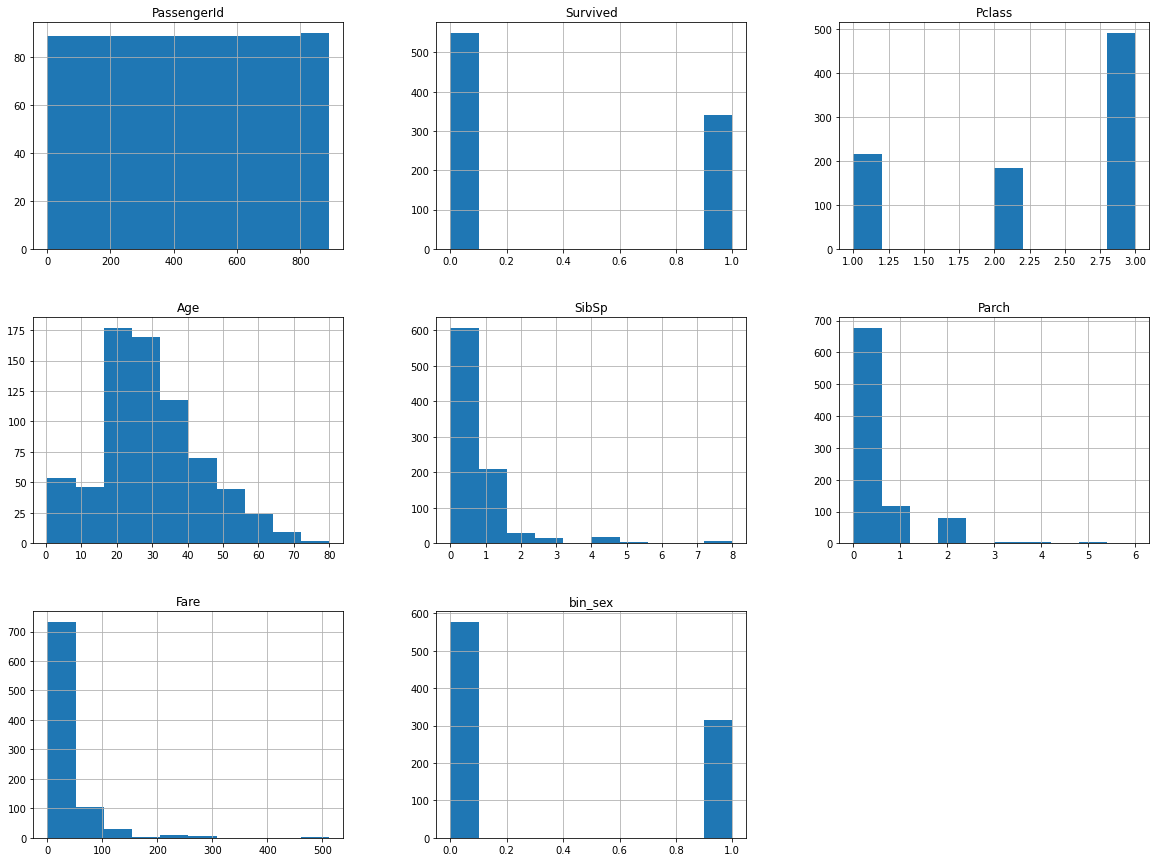

In [6]:
df.hist(figsize=(20,15))

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df['Embarked'].fillna('S',inplace=True)

In [9]:
df['Child'] = df['Age'].apply(lambda x:1 if x<10 else 0)
#df['Senior'] = df['Age'].apply(lambda x:1 if x>50 else 0)

In [10]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df = df.join(pd.DataFrame(lb.fit_transform(df["Embarked"]),
                          columns=lb.classes_, 
                          index=df.index))

In [11]:
df_to_train = df.drop({'PassengerId','Name','Sex','Ticket','Cabin','Embarked'},axis=1)

In [12]:
df_to_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,bin_sex,Child,C,Q,S
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,0,1


In [13]:
median_age_men=df_to_train[df_to_train['bin_sex']==0]['Age'].median()
median_age_women=df_to_train[df_to_train['bin_sex']==1]['Age'].median()

In [14]:
df_to_train.loc[(df_to_train.Age.isnull()) & (df_to_train['bin_sex']==0),'Age']=median_age_men
df_to_train.loc[(df_to_train.Age.isnull()) & (df_to_train['bin_sex']==1),'Age']=median_age_women

In [15]:
df_to_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   bin_sex   891 non-null    int64  
 7   Child     891 non-null    int64  
 8   C         891 non-null    int32  
 9   Q         891 non-null    int32  
 10  S         891 non-null    int32  
dtypes: float64(2), int32(3), int64(6)
memory usage: 66.3 KB


In [16]:
corr_matrix = df_to_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
bin_sex     0.543351
Fare        0.257307
C           0.168240
Child       0.128812
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.073296
S          -0.149683
Pclass     -0.338481
Name: Survived, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()

In [18]:
scaled_data = pd.DataFrame(scaler.fit_transform(df_to_train[{'Fare','Age'}]),
                          columns=['Fare','Age'], 
                          index=df_to_train.index)

In [19]:
df_to_train['Fare'] = scaled_data['Fare']
df_to_train['Age'] = scaled_data['Age']

In [20]:
x_train = df_to_train.drop({'Survived'},axis=1)
y_train = df_to_train['Survived']

### Cleaning the test data set

In [25]:
testdf = pd.read_csv('test.csv')

In [26]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
testdf['bin_sex'] = testdf['Sex'].apply(lambda x:0 if(x=='male') else 1)

In [28]:
testdf['Child'] = testdf['Age'].apply(lambda x:1 if x<10 else 0)

In [29]:
testdf = testdf.join(pd.DataFrame(lb.fit_transform(testdf["Embarked"]),
                          columns=lb.classes_, 
                          index=testdf.index))

In [30]:
median_age_men=testdf[testdf['bin_sex']==0]['Age'].median()
median_age_women=testdf[testdf['bin_sex']==1]['Age'].median()

In [31]:
testdf.loc[(testdf.Age.isnull()) & (testdf['bin_sex']==0),'Age']=median_age_men
testdf.loc[(testdf.Age.isnull()) & (testdf['bin_sex']==1),'Age']=median_age_women

In [32]:
testdf.loc[testdf['Fare'].isnull(),'Fare'] = testdf['Fare'].median()

In [33]:
scaled_data = pd.DataFrame(scaler.fit_transform(testdf[{'Fare','Age'}]),
                          columns=['Fare','Age'], 
                          index=testdf.index)

In [34]:
testdf['Fare'] = scaled_data['Fare']
testdf['Age'] = scaled_data['Age']

In [35]:
test_x = testdf.drop({'PassengerId','Name','Sex','Ticket','Cabin','Embarked'},axis=1)

In [36]:
test_x.head()

,Pclass,Age,SibSp,Parch,Fare,bin_sex,Child,C,Q,S
0,3,0.386231,0,0,-0.497413,0,0,0,1,0
1,3,1.371370,1,0,-0.512278,1,0,0,0,1
2,2,2.553537,0,0,-0.464100,0,0,0,1,0
3,3,-0.204852,0,0,-0.482475,0,0,0,0,1
4,3,-0.598908,1,1,-0.417492,1,0,0,0,1


### Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
print("score on train: "+ str(lr.score(x_train, y_train)))

score on train: 0.8148148148148148


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [23]:
y_train_pred = cross_val_predict(lr, x_train, y_train, cv=3)  

In [24]:
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

0.7643312101910829
0.7017543859649122
0.7317073170731707


In [37]:
predic = lr.predict(test_x)

In [ ]:
pid = testdf['PassengerId'].array
d = {'PassengerId' : pid,'Survived':predic}
savedat = pd.DataFrame(d)
savedat.to_csv('lr.csv',index=False)

## RandomForestClassifier with GridsearchCV

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5, 10, 15, 20, 25, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_rf = RandomForestClassifier(bootstrap = True, max_depth = 10, min_samples_leaf = 2,
                                 min_samples_split = 5, n_estimators = 50, random_state = 42)

In [ ]:
best_rf.fit(x_train, y_train)
print("score on train: "+ str(best_rf.score(x_train, y_train)))

In [ ]:
predic = best_rf.predict(test_x)

In [ ]:
pid = testdf['PassengerId'].array
d = {'PassengerId' : pid,'Survived':predic}
savedat = pd.DataFrame(d)
savedat.to_csv('rf.csv',index=False)